# Lab 1 - Univariate analysis

## Content identification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
data = pd.read_csv('datasets/pd_speech_features.csv', header=1, sep=',', decimal='.')
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
data.shape

(756, 755)

In [4]:
len(data[data.gender==1])

390

In [5]:
len(data[data.gender==0])

366

According to the dataset description: There are 3 records of each patient, and the data is divided in a study group (188 patients, which 107 are men and 81 women) and a control group (64 people without the disease, which 23 are men and 41 women).

## Variables Type and Domain

In [6]:
data.dtypes

id                              int64
gender                          int64
PPE                           float64
DFA                           float64
RPDE                          float64
numPulses                       int64
numPeriodsPulses                int64
meanPeriodPulses              float64
stdDevPeriodPulses            float64
locPctJitter                  float64
locAbsJitter                  float64
rapJitter                     float64
ppq5Jitter                    float64
ddpJitter                     float64
locShimmer                    float64
locDbShimmer                  float64
apq3Shimmer                   float64
apq5Shimmer                   float64
apq11Shimmer                  float64
ddaShimmer                    float64
meanAutoCorrHarmonicity       float64
meanNoiseToHarmHarmonicity    float64
meanHarmToNoiseHarmonicity    float64
minIntensity                  float64
maxIntensity                  float64
meanIntensity                 float64
f1          

In [7]:
cat_vars = data.select_dtypes(include='object')
for att in cat_vars:
    print(att, data[att].unique())

There are no object type in the dataset

## Missing values

In [8]:
mv = {}
count_na = 0
for var in data:
    mv[var] = data[var].isna().sum()
    count_na += data[var].isna().sum()
print('Total of missing values on dataset:', count_na)
# mv

Total of missing values on dataset: 0


## Variables Distribuition

In [9]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [10]:
# report of all data
profile = pp.ProfileReport(data)
# since it take a while, it's possible to create an html file to see without running the cell again
# pp.ProfileReport(data).to_file()

In [11]:
# creates a list of rejected variables
rejected_variables = profile.get_rejected_variables()

In [12]:
# dataframe with only the non rejected variables
new_data = data.loc[:, ~data.columns.isin(rejected_variables)]
new_data.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locShimmer,...,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.00218,0.05883,...,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,2.6202,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.00195,0.05516,...,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,6.5245,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.00176,0.09902,...,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,2.9199,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.00419,0.05451,...,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,4.8460,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.00535,0.05610,...,1.8157,1.7577,1.8821,7.8832,6.1727,5.8416,6.0805,8.2103,6.1164,1


In [13]:
# report for the Baseline Features in case it's necessary
baseline = data.iloc[:,0:23]
rejected_baseline = pp.ProfileReport(baseline).get_rejected_variables()
new_baseline = baseline.loc[:, ~baseline.columns.isin(rejected_baseline)]
new_baseline.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'meanPeriodPulses',
       'stdDevPeriodPulses', 'locPctJitter', 'locShimmer',
       'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity',
       'meanHarmToNoiseHarmonicity'],
      dtype='object')

To understand better the distribuition of the data, two types graphics will be plotted: boxplots; histograms (with and without a Gaussian and an exponencial to compare. These way, it'll be possible to look for outliers and for similar distributions.
Because of the high number of variables, the ways choosen to be plotted was: the Baseline Features not rejected by the Profile Report and at least one of each group (the first line of the csv was considered as groups):
    - No group: 'id', 'gender', 'class'
    - Baseline Features: 'id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity'
    - Intensity Parameters: 'minIntensity'
    - Formant Frequencies: 'f1'
    - Bandwidth Parameters: 'b1'
    - Vocal Fold: 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO'
    - MFCC: 'mean_Log_energy', 'std_delta_log_energy'
    - Wavelet Features: 'Ea'
    - TQWT Features: 'tqwt_energy_dec_1'

In [14]:
analysis = new_data[['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'f1', 'b1', 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO', 'mean_Log_energy', 'std_delta_log_energy', 'Ea', 'tqwt_energy_dec_1']]
analysis.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locShimmer,...,minIntensity,f1,b1,GQ_prc5_95,GNE_mean,VFER_NSR_SEO,mean_Log_energy,std_delta_log_energy,Ea,tqwt_energy_dec_1
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.00218,0.05883,...,69.997496,539.342735,101.092218,0.77778,1.17300,1.3305,9.1817,0.049933,99.9996,0.000011
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.00195,0.05516,...,67.415903,564.363614,58.465428,0.81250,1.02210,1.3177,9.6074,0.037774,99.9998,0.000028
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.00176,0.09902,...,62.661706,548.444604,160.387771,0.81818,0.84951,1.3078,9.0512,0.109450,99.9999,0.000034
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.00419,0.05451,...,76.306989,819.529588,238.667052,0.98548,0.83405,1.2986,9.8453,0.039296,99.0823,0.000051
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.00535,0.05610,...,76.645686,846.796144,402.216738,0.97847,0.83556,1.3156,10.1542,0.028652,98.6930,0.000044


<Figure size 800x550 with 0 Axes>

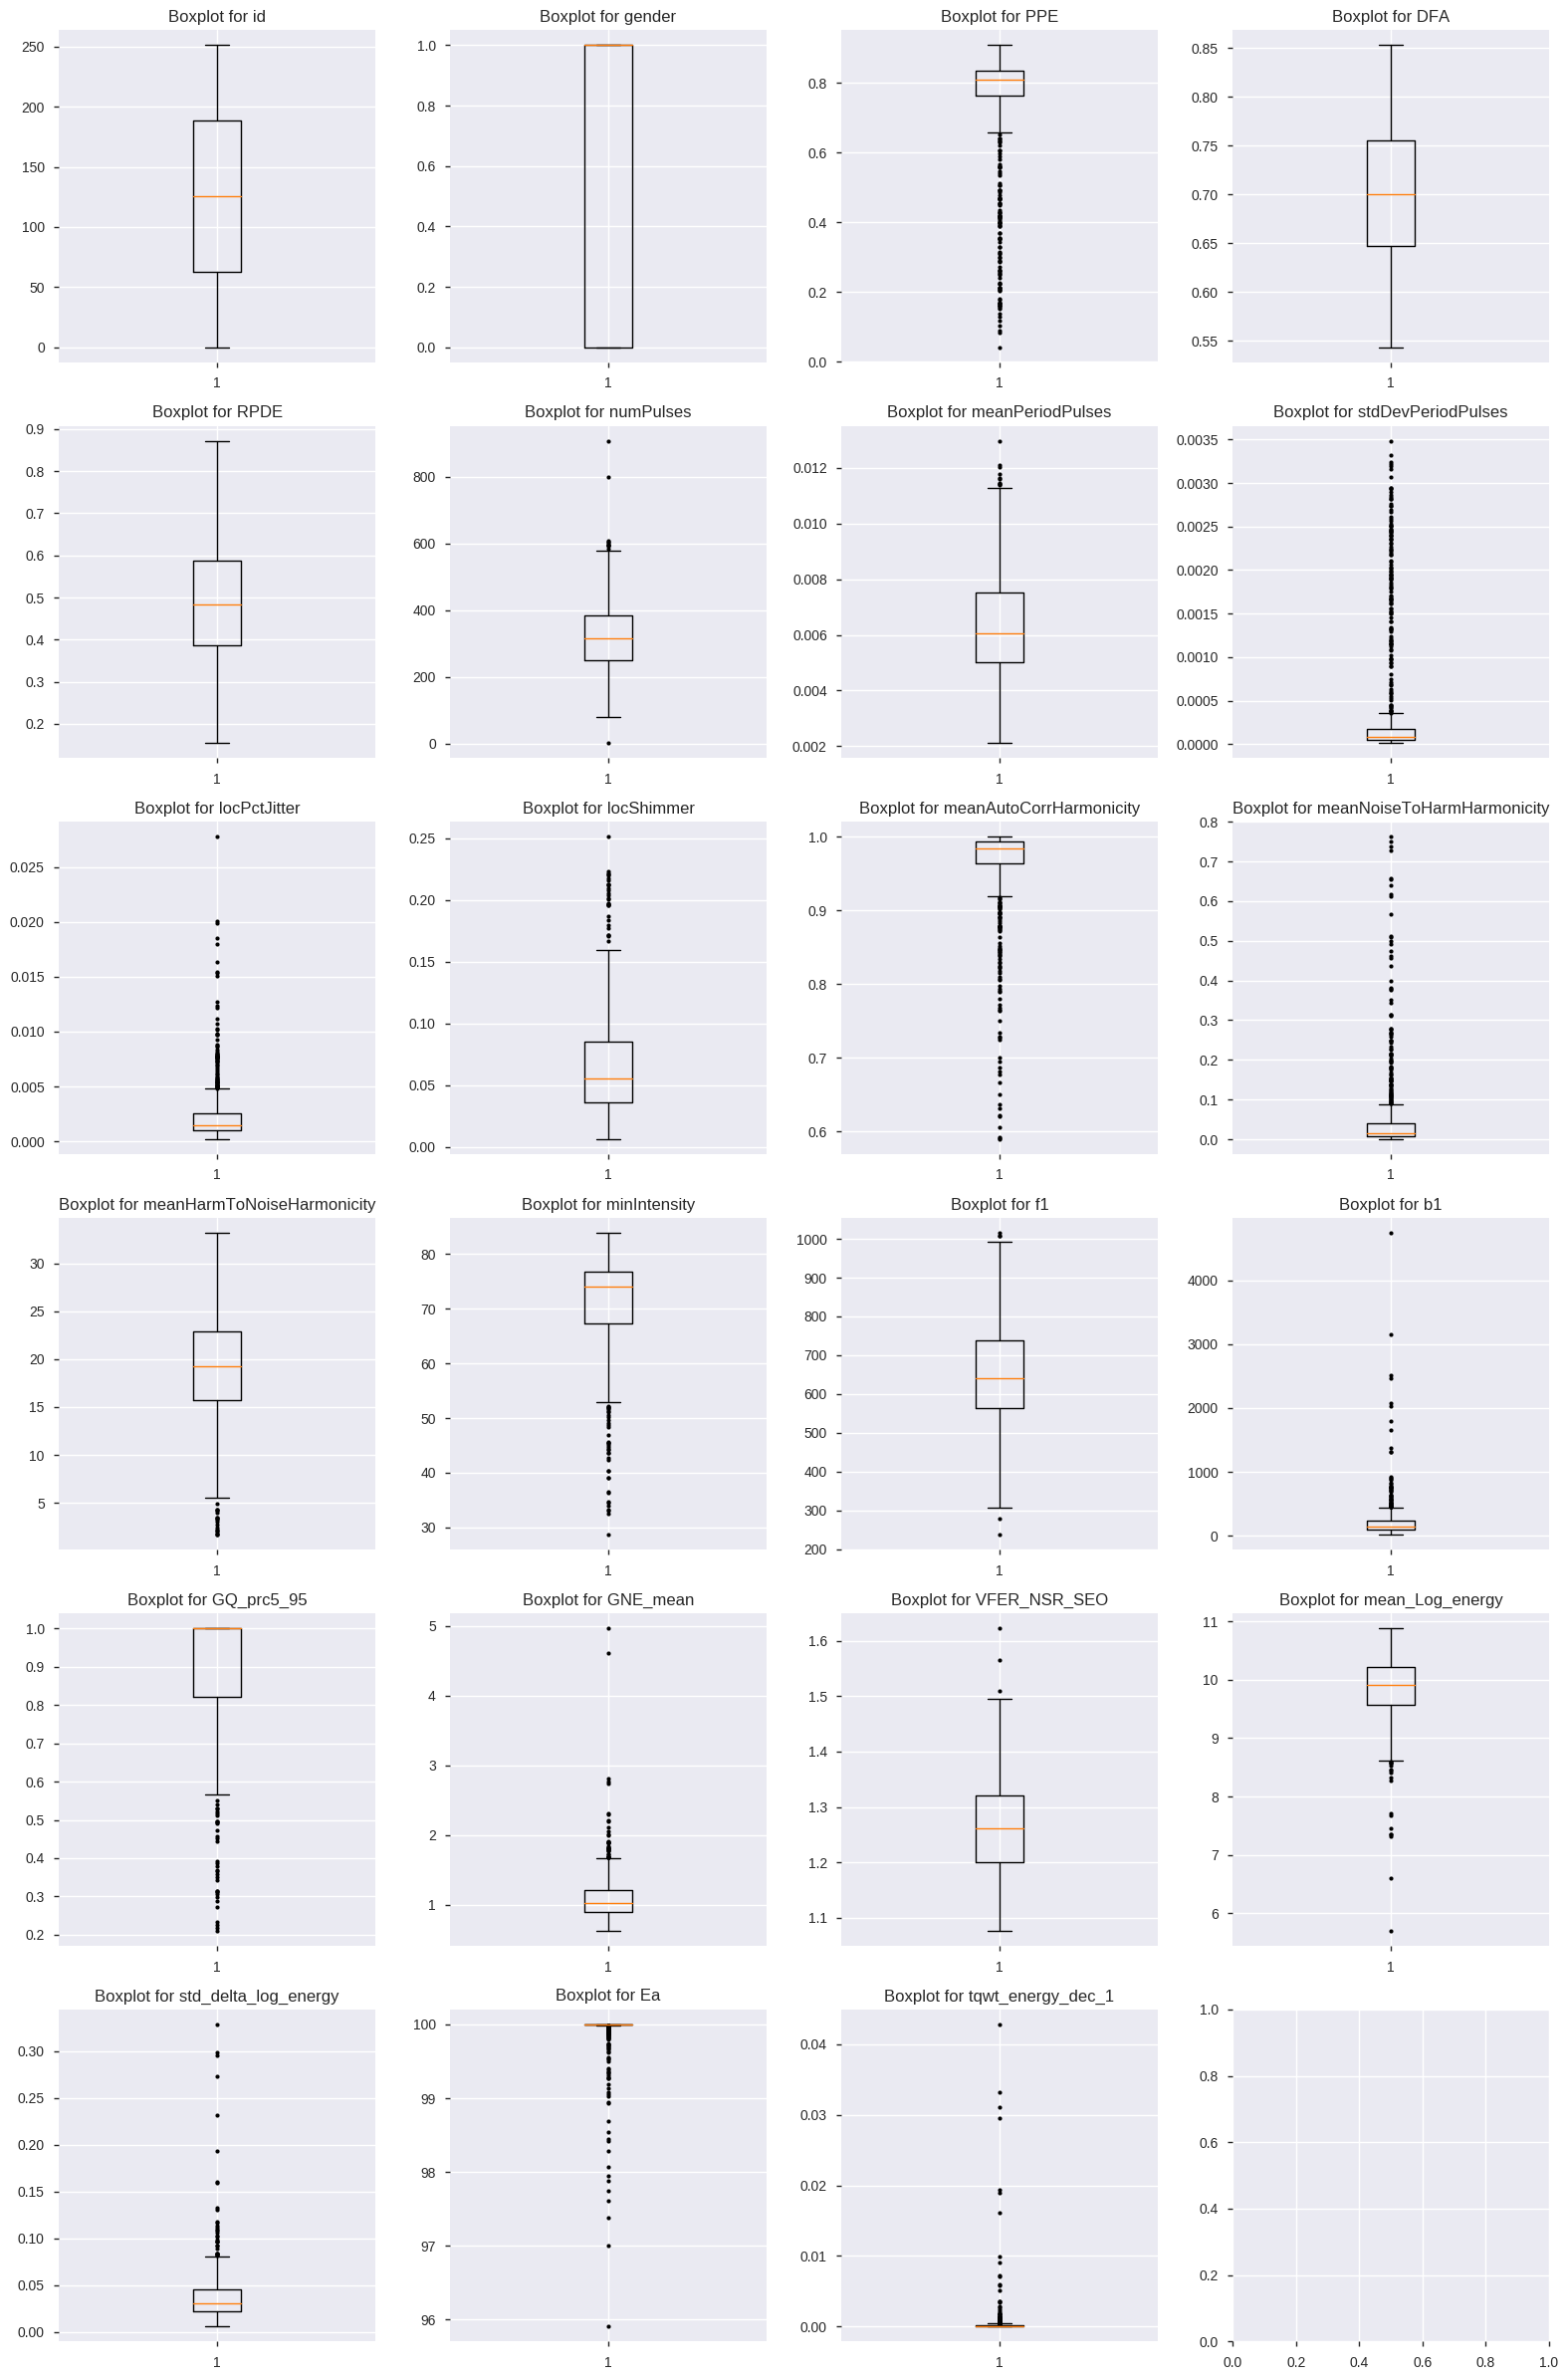

In [15]:
def choose_grid(n):
    if (n % 4 == 0):
        return n // 4, 4
    else:
        return n // 4 + 1, 4

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(analysis[columns[n]].dropna().values, sym='k.')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

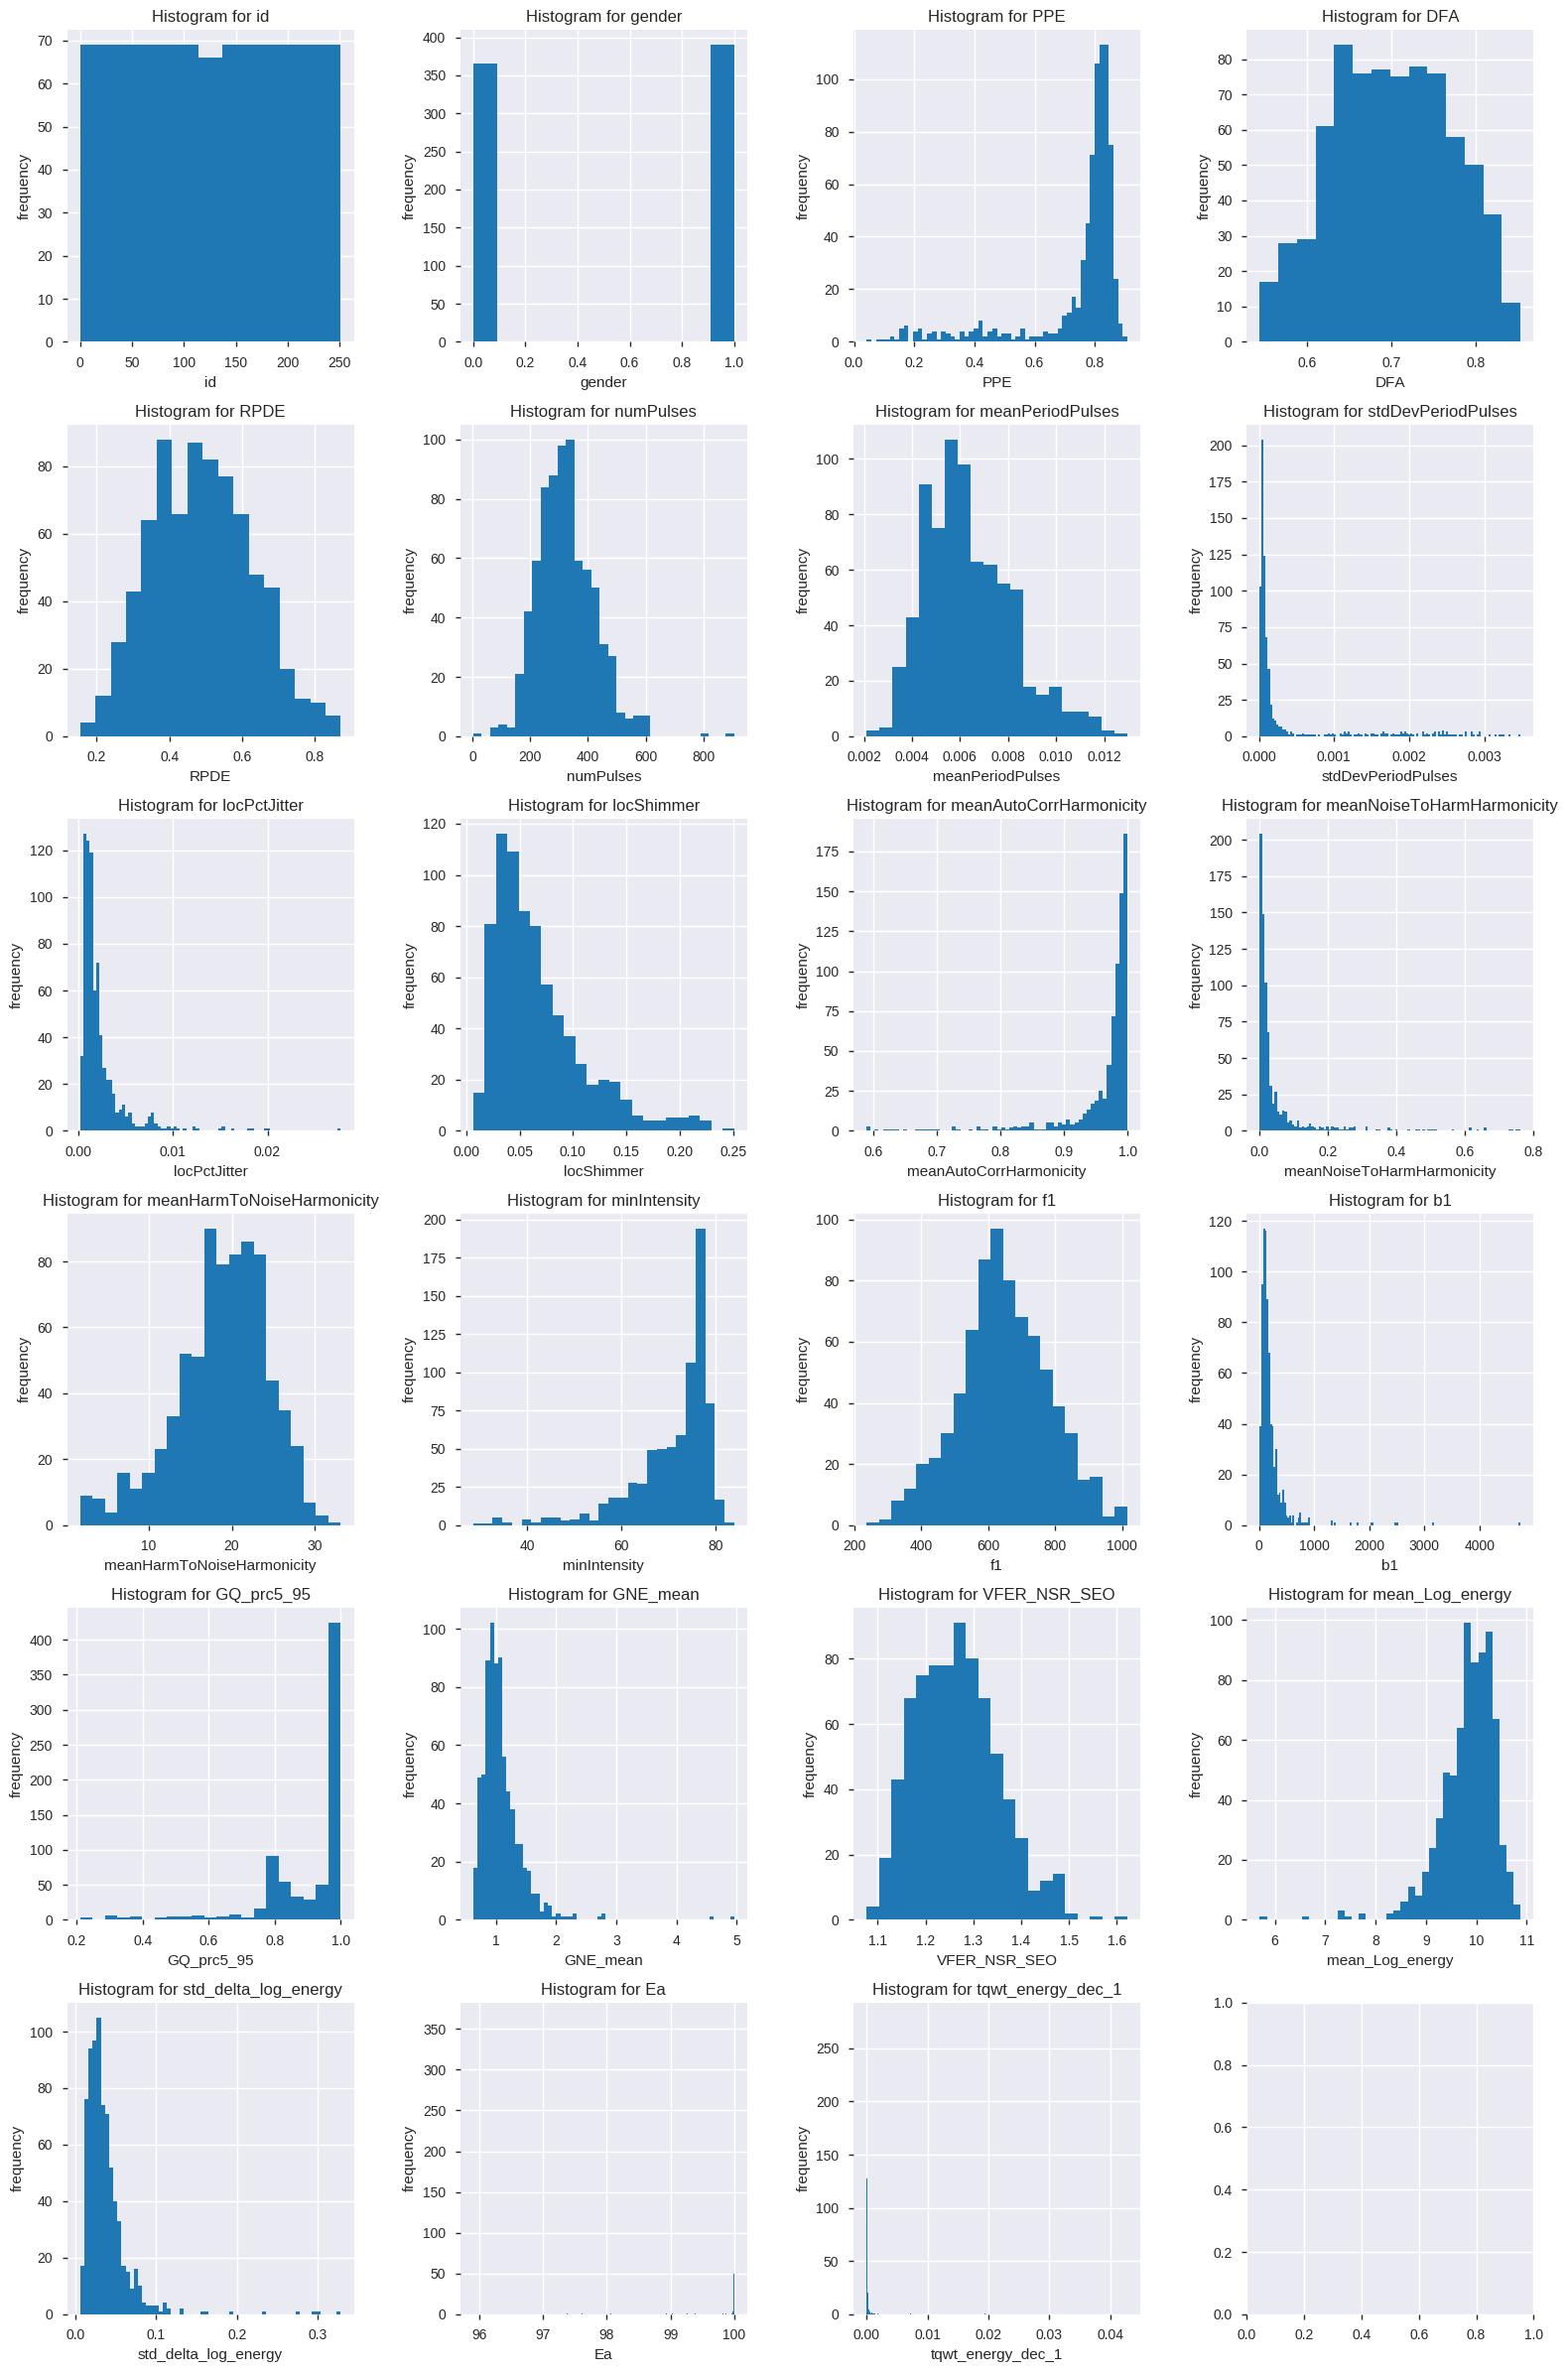

In [16]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0 , 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel('frequency')
    axs[i, j].hist(analysis[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

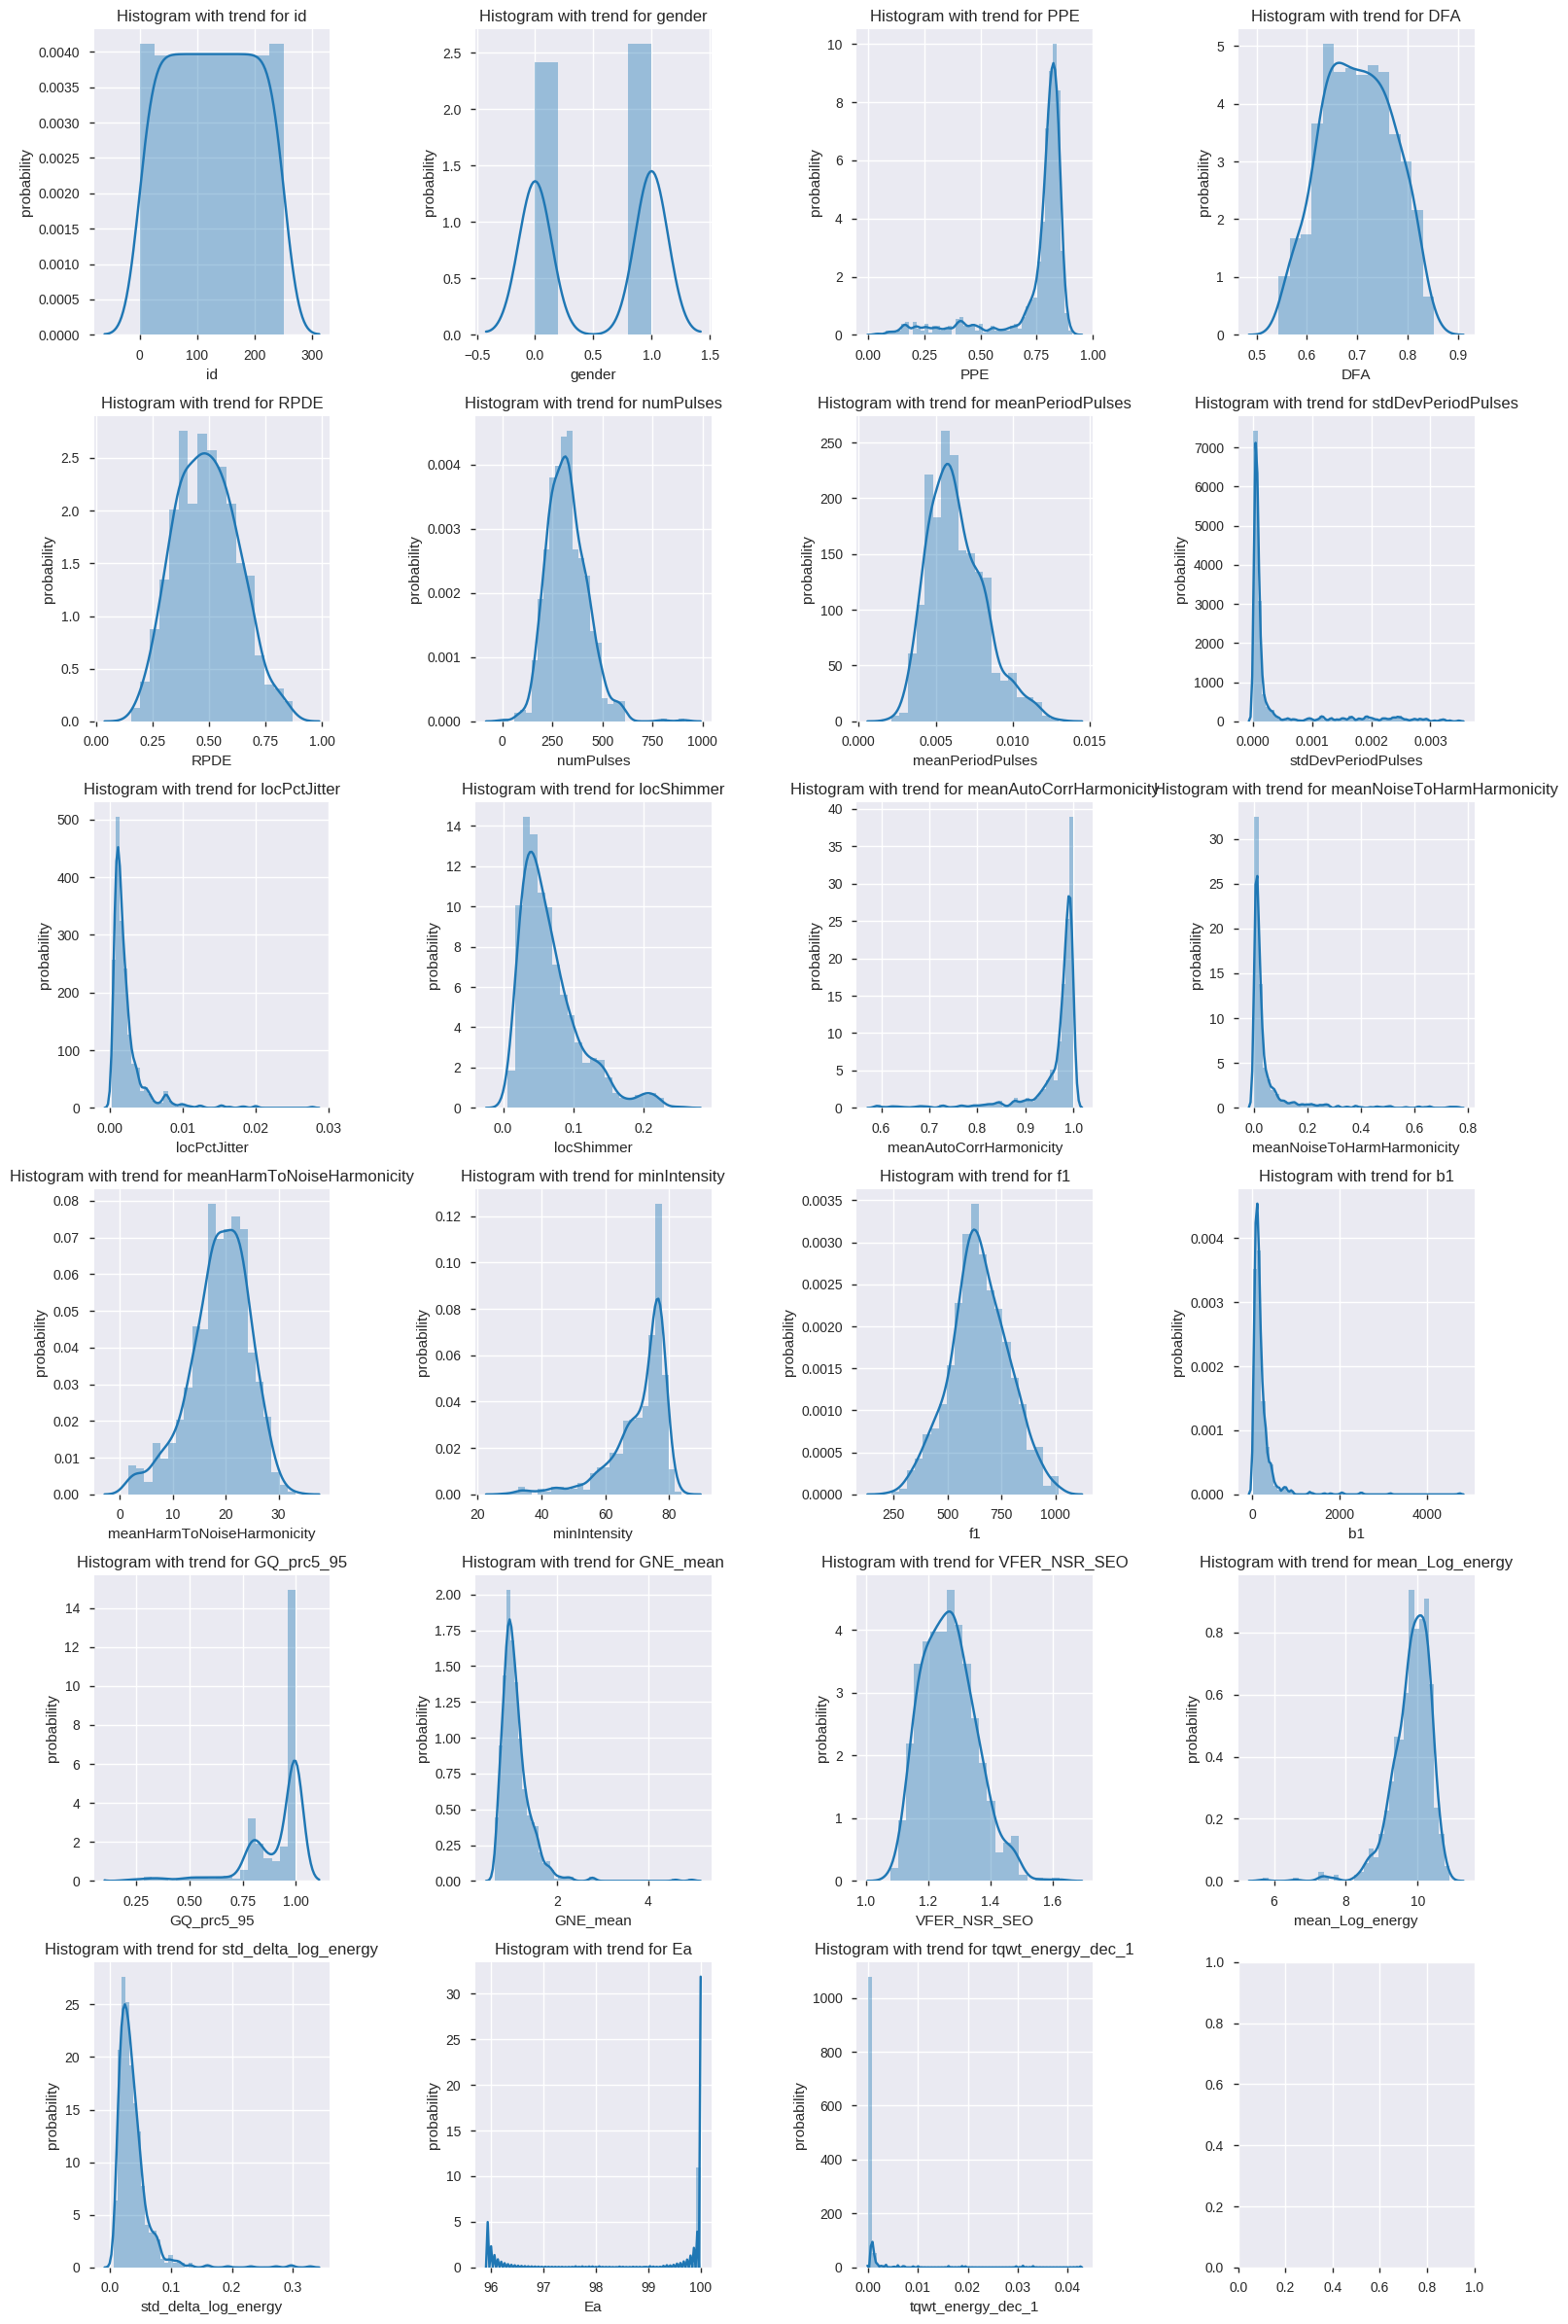

In [17]:
import seaborn as sns

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(analysis[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

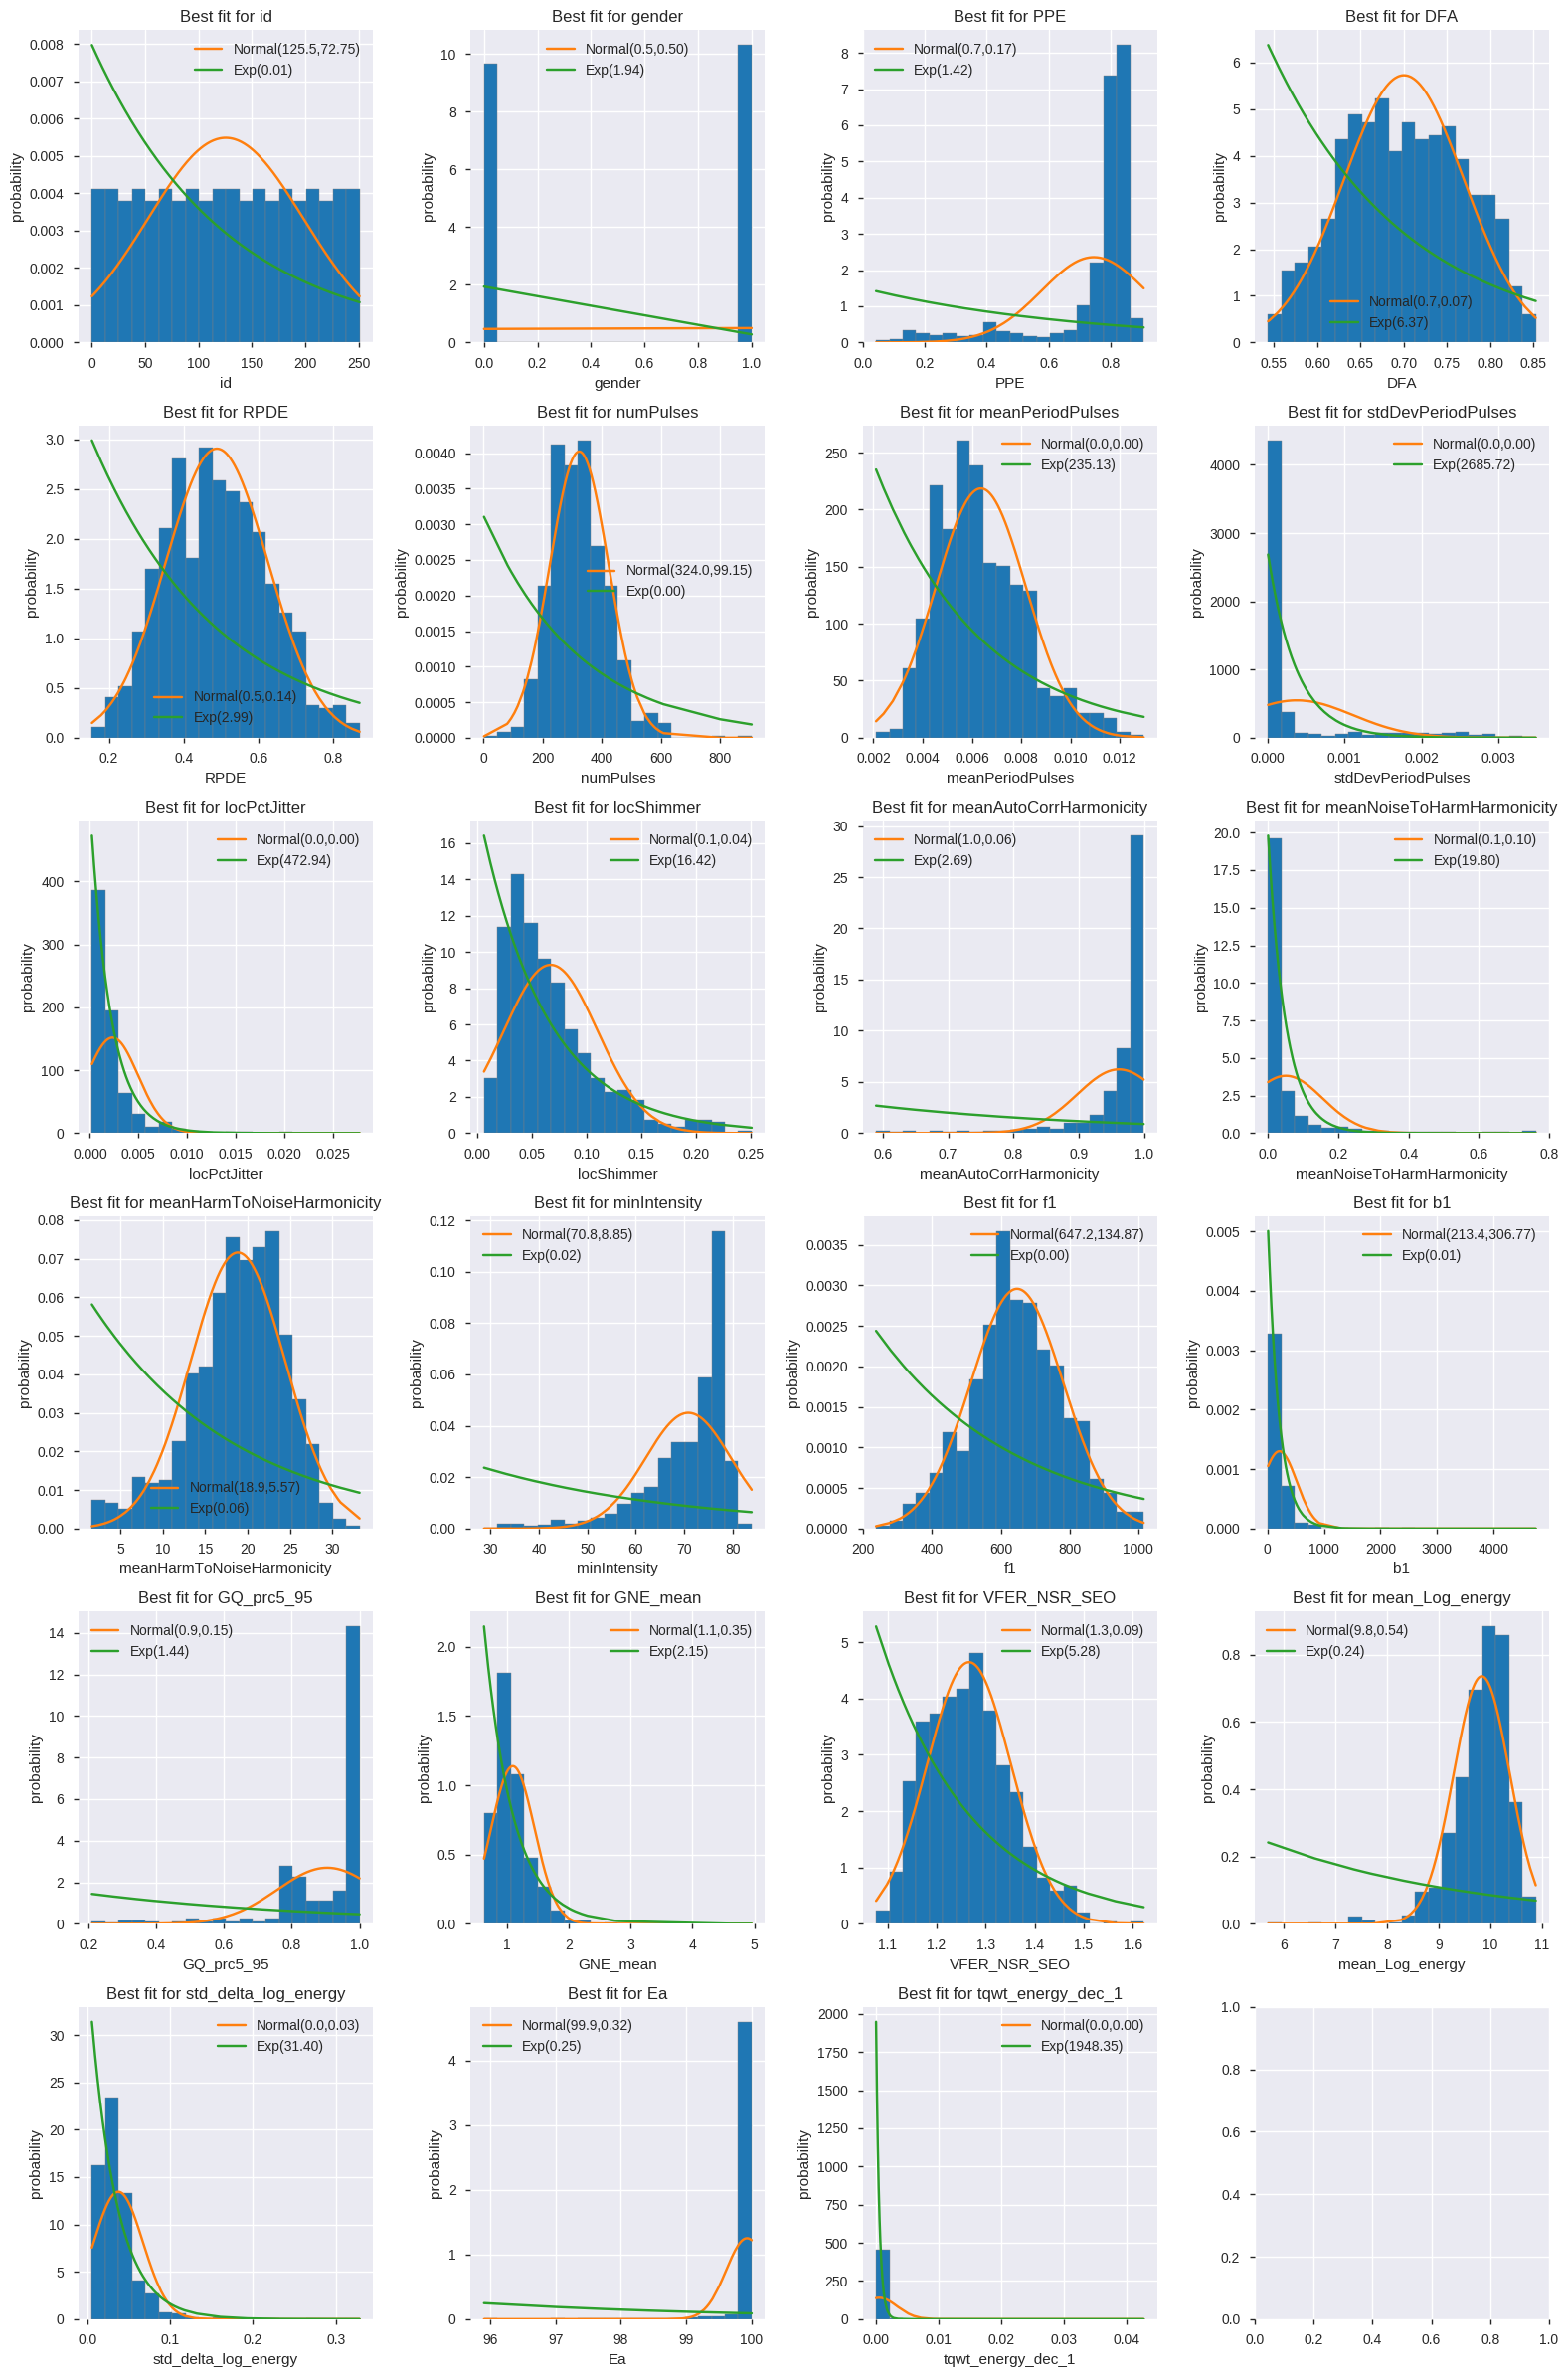

In [18]:
import scipy.stats as _stats 
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)
    
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], analysis[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Finally, it'll be analyzed the effects of granularity for each variable.

<Figure size 800x550 with 0 Axes>

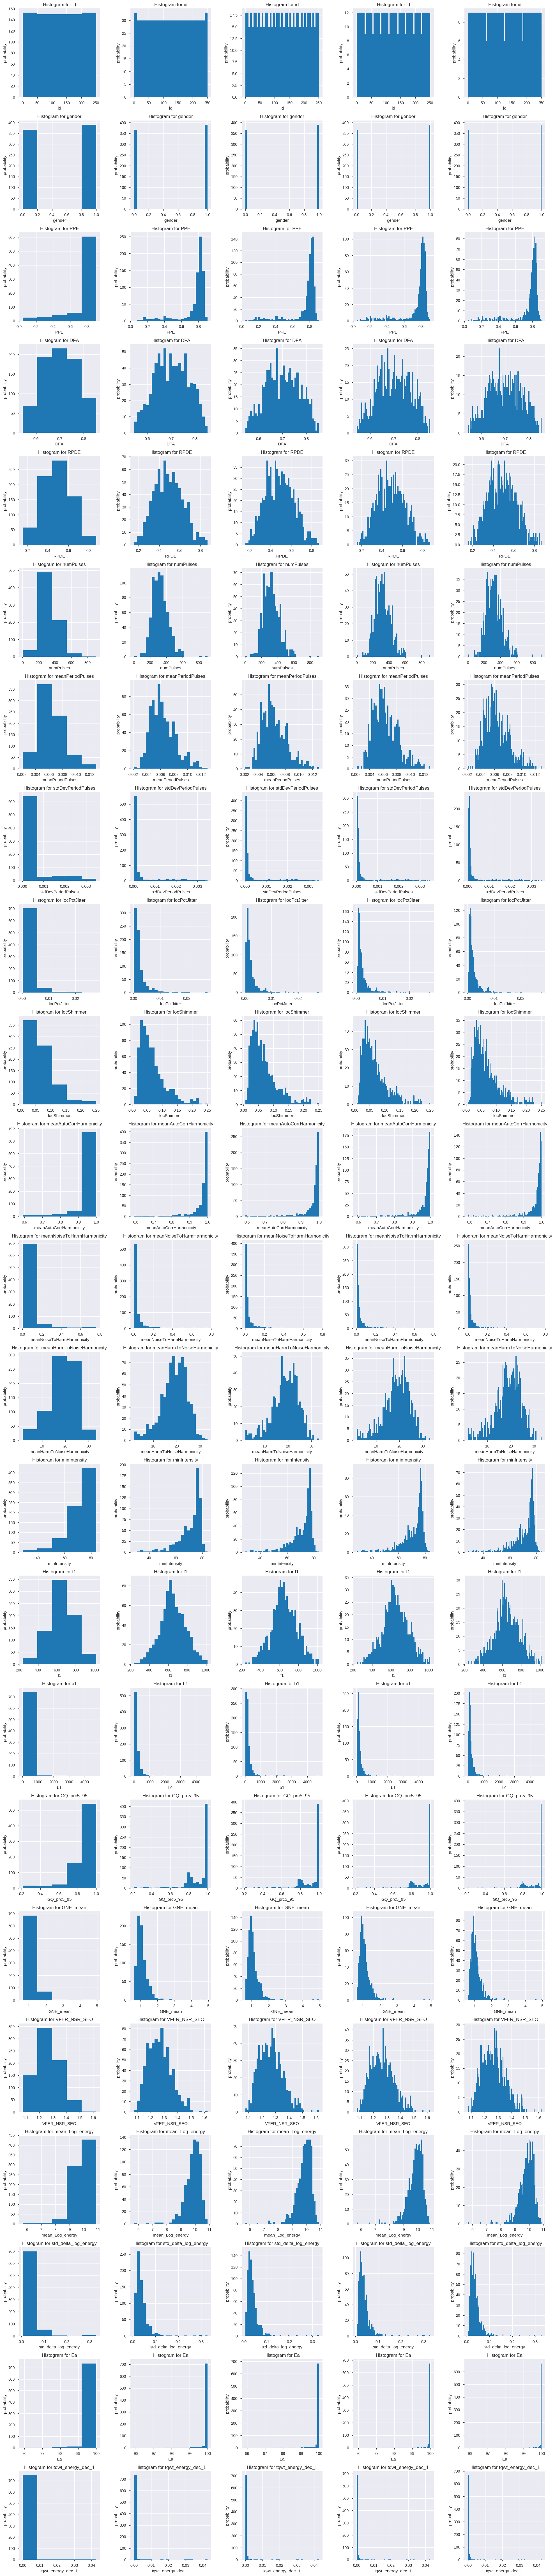

In [19]:
columns = analysis.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(analysis[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()